# Assignment No.10

#### Solve the Taxi problem using reinforcement learning, where an agent acts as a taxi driver to pick
#### up and drop off passengers efficiently.

#### Name: Wavhal Prathmesh Navnath
#### Roll No:23107137
#### Class :  TY-B



In [ ]:
#mounting drive
from google.colab import files

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!apt-get install xll-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y Xvfb python-opengl > /dev/null 2>&1

In [ ]:
#importing OpenAI gym
import gym


In [ ]:
# creating the environment
env = gym.make('Taxi-v3').env

In [ ]:
#resseting the environment
env.reset()

NameError: name 'env' is not defined

In [ ]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
!apt-get install -y xvfb
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!pip install pygame #install this in case of running into any issues

**Rendering**

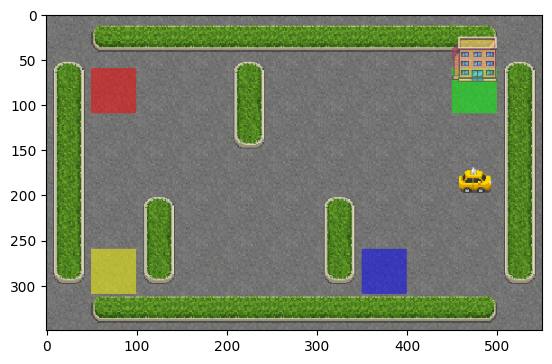

In [ ]:
env.reset()
prev_screen = env.render(mode= 'rgb_array')
plt.imshow(prev_screen)

for i in range(100):
 #runs until the episode terminates which is 100 iterations.

  #select a random action from the action space of the environment
  action = env.action_space.sample()

  #execute the selected action to create a new state, observation, done or not and additional info
  new_state, obs, done, info = env.step(action)

  #render new state as an RGB array
  new_screen = env.render(mode= 'rgb_array')

  plt.imshow(new_screen)
  #clear previous display
  ipythondisplay.clear_output(wait=True)
  #show new display output
  ipythondisplay.display(plt.gcf())

  if done:
    break

#clear display output
ipythondisplay.clear_output(wait=True)
env.close()

ipythondisplay.clear_output(wait=True)
#close the environment to free up resources
env.close()

In [ ]:
print(f'Action Space {env.action_space}')
print(f'State Space {env.observation_space}')
state= env.encode(3,1,2,0) #encoding the state
print(f'State: {state}')
env.s = state #setting current state of the environment to the encoded state.

Action Space Discrete(6)
State Space Discrete(500)
State: 328


In [ ]:
env.P[328] #accessing transition dynamics of state 328 to know how the environment responds to actions taken from state 328

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

**Exploration**

In [ ]:
env.S = 328 #start interaction from state 328
epochs = 0 #no of steps
penalties, rewards = 0,0
frames = [] #dict
done = False

while not done:
  #random action
  action = env.action_space.sample()
  #execute action and observe
  state, reward, done, info = env.step(action)

  if reward == -10:
    penalties += 1

  #record frames in order to analyze agent's behavior
  frames.append({
      'frame': env.render(mode='ansi'),
      'state': state,
      'action': action,
      'reward': reward
      }
  )

  epochs +=1

  print(f'Timesteps taken: {epochs}')
  print(f'Penalties incurred: {penalties}')

Timesteps taken: 1
Penalties incurred: 1
Timesteps taken: 2
Penalties incurred: 2
Timesteps taken: 3
Penalties incurred: 2
Timesteps taken: 4
Penalties incurred: 3
Timesteps taken: 5
Penalties incurred: 3
Timesteps taken: 6
Penalties incurred: 3
Timesteps taken: 7
Penalties incurred: 4
Timesteps taken: 8
Penalties incurred: 4
Timesteps taken: 9
Penalties incurred: 5
Timesteps taken: 10
Penalties incurred: 6
Timesteps taken: 11
Penalties incurred: 7
Timesteps taken: 12
Penalties incurred: 8
Timesteps taken: 13
Penalties incurred: 8
Timesteps taken: 14
Penalties incurred: 9
Timesteps taken: 15
Penalties incurred: 10
Timesteps taken: 16
Penalties incurred: 11
Timesteps taken: 17
Penalties incurred: 11
Timesteps taken: 18
Penalties incurred: 11
Timesteps taken: 19
Penalties incurred: 11
Timesteps taken: 20
Penalties incurred: 11
Timesteps taken: 21
Penalties incurred: 11
Timesteps taken: 22
Penalties incurred: 12
Timesteps taken: 23
Penalties incurred: 13
Timesteps taken: 24
Penalties incu

**Visualization of Exploration**

In [ ]:
#showing in frames
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
  for i, frame in enumerate(frames):
    clear_output(wait=True) #clear output of previous frame before displaying next frame
    print(frame['frame'])
    print(f'Timestep: {i + 1}')
    print(f'State: {frame["state"]}')
    print(f'Action: {frame["action"]}')
    print(f'Reward: {frame["reward"]}')
    sleep(.1) #pause by 0.1s before displaying next frame
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 331
State: 85
Action: 5
Reward: 20


In [ ]:
#initializing Qtable
state_size = env.observation_space.n
action_size = env.action_space.n
Q = np.zeros([state_size, action_size])

**Traing the agent using Exploration and Exploitation.**

In [ ]:
%%time
import random
from IPython.display import clear_output

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 20.3 µs


In [ ]:
alpha = 0.1 #learning_rate
gamma = 0.6 #discount_rate
epsilon = 0.1 #exploration_rate

all_epochs = []
all_penalties = []

In [ ]:
for i in range(i, 100001):
  #number of episodes = 100001, runs 100000 times

  #resetting the environment
  state = env.reset()

  epochs, penalties, reward = 0, 1, 0

  done = False
  #epsilon greedy function
  while not done:
    #exploration vs exploitation
    if random.uniform(0, 1) < epsilon:
      action = env.action_space.sample() #exploration
    else:
      action = np.argmax(Q[state]) #exploitation

    #take action and observe next state, reward...
    new_state, reward, done, info = env.step(action)

    #making update to the values in the Qtable
    old_value = Q[state,action]
    next_max = np.max(Q[new_state])
    #q-learning eqn
    new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
    Q[state, action] = new_value

    #updating rewards
    if reward == -10:
      penalties += 1

    #updating states
    state = new_state

    #updating epochs
    epochs += 1

  #clear the output for every 100 episodes
  if i % 100 ==0:
    clear_output(wait=True)
    print(f'Episode: {i}') #print no of current episode

print('Training completed. \n')

Episode: 100000
Training completed. 



In [ ]:
Q[328] #q-value associated with state 328

array([ -2.40390416,  -2.27325184,  -2.40950991,  -2.35752573,
       -10.86822935, -10.93302827])

**Testing the agent**

In [ ]:
total_epochs, total_penalties = 1, 1
episodes = 100

for _ in range(episodes):
  #resetting
  state = env.reset()
  epochs, penalties, reward = 0, 1, 0

  done = False
  #while episode is not yet finished
  while not done:
    #select action with highest q-value for the current state
    action = np.argmax(Q[state])
    #execute the selected action and return...
    state, reward, done, info = env.step(action)

    #penalties
    if reward == -10:
      penalties += 1

      #no of steps increases too for each penalty
      epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f'Results after {episodes} episodes: ')
print(f'Average timesteps per episode: {total_epochs/episodes}')
print(f'Average penalties per episode: {total_penalties/episodes}')

Results after 100 episodes: 
Average timesteps per episode: 0.01
Average penalties per episode: 12.67


**Watching the taxi drop-off**

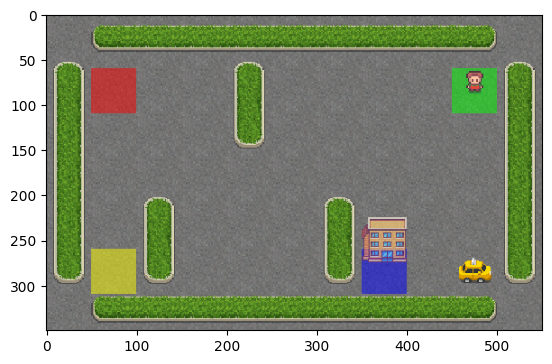

In [ ]:
# Reset environment
env.reset()
prev_screen = env.render(mode='rgb_array') #render initial state
plt.imshow(prev_screen)

for _ in range(episodes):
  # Take action
  action = env.action_space.sample()
  state, penalty, done, info = env.step(action)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()

ipythondisplay.clear_output(wait=True)
env.close()